In [1]:
import argparse
import time
import csv
import pickle
import operator
import datetime
import os

In [9]:
parser = argparse.ArgumentParser()
parser.add_argument('--dataset', default='sample', help='dataset name: diginetica/yoochoose/sample')
opt = parser.parse_args("")
print(opt)

#set dataset
dataset_url = 'SR-GNN-master/datasets/'
dataset = 'sample_train-item-views.csv'
if opt.dataset == 'diginetica':
    dataset = 'train-item-views.csv'
elif opt.dataset =='yoochoose':
    dataset = 'yoochoose-clicks.dat'
dataset = dataset_url + dataset
print(dataset)

Namespace(dataset='sample')
SR-GNN-master/datasets/sample_train-item-views.csv


In [52]:
#load data
with open(dataset, "r") as f:
    if opt.dataset == 'yoochoose':
        reader = csv.DictReader(f, delimiter=',')
    else:
        reader = csv.DictReader(f, delimiter=';')
    sess_clicks = {} #session_id:[item_id,...]
    sess_date = {}
    ctr = 0
    curid = -1
    curdate = None
    #讀取每一行
    for data in reader: 
        sessid = data['session_id']
        #有換sessid才會進入下面if
        if curdate and not curid == sessid:
            date = time.mktime(time.strptime(curdate, '%Y-%m-%d'))
            sess_date[curid] = date
        curid = sessid
        item = data['item_id'], int(data['timeframe'])
        curdate = data['eventdate']
        if sessid in sess_clicks:
            sess_clicks[sessid] += [item]
        else:
            sess_clicks[sessid] = [item]
        ctr += 1
    #sess_clicks: session_id:[(item_id,timeframe),(...,...),(...,...)...]
    #結束讀取每一行了
    date = time.mktime(time.strptime(curdate, '%Y-%m-%d'))
    for i in list(sess_clicks): #i為session_id的迭代
        #依照timeframe由小到大排序
        sorted_clicks = sorted(sess_clicks[i], key=operator.itemgetter(1))
        #選取出item_id(由timeframe小到大排序過後的)
        sess_clicks[i] = [c[0] for c in sorted_clicks]
    sess_date[curid] = date
print("-- Reading data @ %ss" % datetime.datetime.now())


OrderedDict([('session_id', '2'), ('user_id', 'NA'), ('item_id', '3147'), ('timeframe', '883039'), ('eventdate', '2016-05-09')])
1
OrderedDict([('session_id', '4'), ('user_id', 'NA'), ('item_id', '13931'), ('timeframe', '21812'), ('eventdate', '2016-05-09')])
2
OrderedDict([('session_id', '5'), ('user_id', 'NA'), ('item_id', '5140'), ('timeframe', '22430'), ('eventdate', '2016-05-09')])
4
OrderedDict([('session_id', '6'), ('user_id', 'NA'), ('item_id', '73191'), ('timeframe', '53123'), ('eventdate', '2016-05-09')])
5
OrderedDict([('session_id', '7'), ('user_id', 'NA'), ('item_id', '59248'), ('timeframe', '38806'), ('eventdate', '2016-05-09')])
6
OrderedDict([('session_id', '8'), ('user_id', 'NA'), ('item_id', '11542'), ('timeframe', '10067'), ('eventdate', '2016-04-10')])
7
OrderedDict([('session_id', '10'), ('user_id', 'NA'), ('item_id', '69597'), ('timeframe', '193275'), ('eventdate', '2016-04-05')])
8
OrderedDict([('session_id', '12'), ('user_id', 'NA'), ('item_id', '4168'), ('timef

OrderedDict([('session_id', '735'), ('user_id', 'NA'), ('item_id', '14737'), ('timeframe', '6166'), ('eventdate', '2016-05-10')])
734
OrderedDict([('session_id', '736'), ('user_id', 'NA'), ('item_id', '84268'), ('timeframe', '20794'), ('eventdate', '2016-05-10')])
735
OrderedDict([('session_id', '737'), ('user_id', 'NA'), ('item_id', '196635'), ('timeframe', '211967'), ('eventdate', '2016-05-10')])
736
OrderedDict([('session_id', '739'), ('user_id', 'NA'), ('item_id', '49272'), ('timeframe', '43134'), ('eventdate', '2016-05-10')])
737
OrderedDict([('session_id', '740'), ('user_id', 'NA'), ('item_id', '42178'), ('timeframe', '583620'), ('eventdate', '2016-03-18')])
739
OrderedDict([('session_id', '741'), ('user_id', 'NA'), ('item_id', '126659'), ('timeframe', '446611'), ('eventdate', '2016-05-10')])
740
OrderedDict([('session_id', '743'), ('user_id', 'NA'), ('item_id', '4245'), ('timeframe', '22062'), ('eventdate', '2016-05-10')])
741
OrderedDict([('session_id', '744'), ('user_id', '248

1435
OrderedDict([('session_id', '1437'), ('user_id', '638'), ('item_id', '6078'), ('timeframe', '18541'), ('eventdate', '2016-02-23')])
1436
OrderedDict([('session_id', '1438'), ('user_id', '639'), ('item_id', '81645'), ('timeframe', '845198'), ('eventdate', '2016-03-10')])
1437
OrderedDict([('session_id', '1439'), ('user_id', '640'), ('item_id', '31420'), ('timeframe', '12181'), ('eventdate', '2016-03-10')])
1438
OrderedDict([('session_id', '1440'), ('user_id', '642'), ('item_id', '35366'), ('timeframe', '21906'), ('eventdate', '2016-02-23')])
1439
OrderedDict([('session_id', '1442'), ('user_id', '644'), ('item_id', '525'), ('timeframe', '20761'), ('eventdate', '2016-02-23')])
1440
OrderedDict([('session_id', '1443'), ('user_id', '645'), ('item_id', '142936'), ('timeframe', '20231'), ('eventdate', '2016-01-12')])
1442
OrderedDict([('session_id', '1444'), ('user_id', '646'), ('item_id', '35015'), ('timeframe', '81412'), ('eventdate', '2016-01-12')])
1443
OrderedDict([('session_id', '1

OrderedDict([('session_id', '2118'), ('user_id', 'NA'), ('item_id', '2820'), ('timeframe', '27343'), ('eventdate', '2016-05-31')])
2116
OrderedDict([('session_id', '2119'), ('user_id', 'NA'), ('item_id', '1084'), ('timeframe', '12465'), ('eventdate', '2016-05-31')])
2118
OrderedDict([('session_id', '2120'), ('user_id', 'NA'), ('item_id', '13831'), ('timeframe', '325653'), ('eventdate', '2016-04-14')])
2119
OrderedDict([('session_id', '2121'), ('user_id', 'NA'), ('item_id', '32059'), ('timeframe', '82899'), ('eventdate', '2016-04-14')])
2120
OrderedDict([('session_id', '2122'), ('user_id', 'NA'), ('item_id', '81339'), ('timeframe', '586792'), ('eventdate', '2016-04-14')])
2121
OrderedDict([('session_id', '2123'), ('user_id', 'NA'), ('item_id', '83263'), ('timeframe', '55766'), ('eventdate', '2016-04-14')])
2122
OrderedDict([('session_id', '2124'), ('user_id', 'NA'), ('item_id', '90181'), ('timeframe', '7790'), ('eventdate', '2016-04-14')])
2123
OrderedDict([('session_id', '2125'), ('use

OrderedDict([('session_id', '2720'), ('user_id', 'NA'), ('item_id', '306797'), ('timeframe', '570308'), ('eventdate', '2016-05-24')])
2719
OrderedDict([('session_id', '2721'), ('user_id', 'NA'), ('item_id', '35981'), ('timeframe', '799480'), ('eventdate', '2016-05-24')])
2720
OrderedDict([('session_id', '2722'), ('user_id', 'NA'), ('item_id', '11143'), ('timeframe', '17215'), ('eventdate', '2016-05-24')])
2721
OrderedDict([('session_id', '2723'), ('user_id', 'NA'), ('item_id', '53294'), ('timeframe', '9060'), ('eventdate', '2016-05-24')])
2722
OrderedDict([('session_id', '2726'), ('user_id', 'NA'), ('item_id', '58739'), ('timeframe', '535477'), ('eventdate', '2016-04-14')])
2723
OrderedDict([('session_id', '2727'), ('user_id', 'NA'), ('item_id', '52232'), ('timeframe', '432770'), ('eventdate', '2016-04-14')])
2726
OrderedDict([('session_id', '2728'), ('user_id', '1273'), ('item_id', '49920'), ('timeframe', '57537'), ('eventdate', '2016-04-14')])
2727
OrderedDict([('session_id', '2729')

3324
OrderedDict([('session_id', '3326'), ('user_id', 'NA'), ('item_id', '59679'), ('timeframe', '14609'), ('eventdate', '2016-03-18')])
3325
OrderedDict([('session_id', '3327'), ('user_id', 'NA'), ('item_id', '46770'), ('timeframe', '22621'), ('eventdate', '2016-03-18')])
3326
OrderedDict([('session_id', '3329'), ('user_id', 'NA'), ('item_id', '8644'), ('timeframe', '13975'), ('eventdate', '2016-03-18')])
3327
OrderedDict([('session_id', '3330'), ('user_id', 'NA'), ('item_id', '11419'), ('timeframe', '149854'), ('eventdate', '2016-03-18')])
3329
OrderedDict([('session_id', '3332'), ('user_id', 'NA'), ('item_id', '48580'), ('timeframe', '241702'), ('eventdate', '2016-05-21')])
3330
OrderedDict([('session_id', '3333'), ('user_id', 'NA'), ('item_id', '4161'), ('timeframe', '88540'), ('eventdate', '2016-05-21')])
3332
OrderedDict([('session_id', '3334'), ('user_id', 'NA'), ('item_id', '174282'), ('timeframe', '556038'), ('eventdate', '2016-05-21')])
3333
OrderedDict([('session_id', '3336'

OrderedDict([('session_id', '3914'), ('user_id', 'NA'), ('item_id', '136275'), ('timeframe', '691254'), ('eventdate', '2016-05-27')])
3912
OrderedDict([('session_id', '3916'), ('user_id', '1707'), ('item_id', '213621'), ('timeframe', '92100'), ('eventdate', '2016-05-27')])
3914
OrderedDict([('session_id', '3917'), ('user_id', 'NA'), ('item_id', '262'), ('timeframe', '7963'), ('eventdate', '2016-05-27')])
3916
OrderedDict([('session_id', '3918'), ('user_id', 'NA'), ('item_id', '196518'), ('timeframe', '597178'), ('eventdate', '2016-05-27')])
3917
OrderedDict([('session_id', '3919'), ('user_id', 'NA'), ('item_id', '382697'), ('timeframe', '11151'), ('eventdate', '2016-05-27')])
3918
OrderedDict([('session_id', '3920'), ('user_id', '1708'), ('item_id', '8145'), ('timeframe', '26965'), ('eventdate', '2016-01-25')])
3919
OrderedDict([('session_id', '3923'), ('user_id', 'NA'), ('item_id', '164656'), ('timeframe', '17980'), ('eventdate', '2016-05-27')])
3920
OrderedDict([('session_id', '3924'

In [75]:
# Filter out length 1 sessions
# 刪除只有一個sess_clicks的資料
for s in list(sess_clicks):
    if len(sess_clicks[s]) == 1:
        del sess_clicks[s]
        del sess_date[s]
# Count number of times each item appears
# item_id出現的次數
iid_counts = {}
for s in sess_clicks:
    seq = sess_clicks[s]
    for iid in seq:
        if iid in iid_counts:
            iid_counts[iid] += 1
        else:
            iid_counts[iid] = 1
# item_id 出現次數的排序，由小到大
sorted_counts = sorted(iid_counts.items(), key=operator.itemgetter(1))

length = len(sess_clicks)
for s in list(sess_clicks):
    curseq = sess_clicks[s]
    #filseq: 只總出現次數>=5次的item_id
    filseq = list(filter(lambda i: iid_counts[i] >= 5, curseq))
    #如果此session下少於2個item_id出現，就刪除。
    if len(filseq) < 2:
        del sess_clicks[s]
        del sess_date[s]
    else:
        sess_clicks[s] = filseq
        
# Split out test set based on dates
# 先找到最新的時間點(秒數)
dates = list(sess_date.items())
maxdate = dates[0][1]
for _, date in dates:
    if maxdate < date:
        maxdate = date

# 7 days for test
# 最近七天的資料當作testing set
# 七天之前的資料都是training set
splitdate = maxdate - 86400 * 7
print('Splitting date', splitdate)      # Yoochoose: ('Split date', 1411930799.0)
tra_sess = filter(lambda x: x[1] < splitdate, dates) # (session_id, date)
tes_sess = filter(lambda x: x[1] > splitdate, dates) # (session_id, date)

# Sort sessions by date
# testing set、training set依照時間序排列，由小到大
tra_sess = sorted(tra_sess, key=operator.itemgetter(1))     # [(session_id, timestamp), (), ]
tes_sess = sorted(tes_sess, key=operator.itemgetter(1))     # [(session_id, timestamp), (), ]
print('# training set:',len(tra_sess))    # 186670    # 7966257
print('# testing set:',len(tes_sess))    # 15979     # 15324
print('training set: %s, ...'%str(tra_sess[:3])[1:-1])
print('testing set: %s, ...'%str(tes_sess[:3])[1:-1])
print("-- Splitting train set and test set @ %ss" % datetime.datetime.now())

Splitting date 1464105600.0
# training set: 372
# testing set: 38
training set: ('2671', 1451923200.0), ('3780', 1452355200.0), ('1213', 1452441600.0), ...
testing set: ('1864', 1464192000.0), ('1867', 1464192000.0), ('1868', 1464192000.0), ...
-- Splitting train set and test set @ 2021-05-24 19:27:08.009557s


In [95]:
tra_sess

[('2671', 1451923200.0),
 ('3780', 1452355200.0),
 ('1213', 1452441600.0),
 ('1479', 1452528000.0),
 ('1190', 1452787200.0),
 ('2707', 1452787200.0),
 ('498', 1453046400.0),
 ('537', 1453046400.0),
 ('2340', 1453132800.0),
 ('2341', 1453132800.0),
 ('794', 1453219200.0),
 ('884', 1453219200.0),
 ('3435', 1453305600.0),
 ('1135', 1453478400.0),
 ('1170', 1453564800.0),
 ('1189', 1453564800.0),
 ('3909', 1453564800.0),
 ('3957', 1453564800.0),
 ('3925', 1453651200.0),
 ('3283', 1453737600.0),
 ('3484', 1453824000.0),
 ('3532', 1453824000.0),
 ('3548', 1453824000.0),
 ('1537', 1453910400.0),
 ('1518', 1453996800.0),
 ('1526', 1454083200.0),
 ('1769', 1454083200.0),
 ('1791', 1454083200.0),
 ('1845', 1454083200.0),
 ('2525', 1454083200.0),
 ('2461', 1454169600.0),
 ('2586', 1454169600.0),
 ('2615', 1454169600.0),
 ('2472', 1454342400.0),
 ('1564', 1454515200.0),
 ('224', 1454688000.0),
 ('236', 1454688000.0),
 ('239', 1454688000.0),
 ('320', 1454688000.0),
 ('329', 1454688000.0),
 ('259', 

In [96]:
# Choosing item count >=5 gives approximately the same number of items as reported in paper
item_dict = {} #item_id:new_index
# Convert training sessions to sequences and renumber items to start from 1
def obtian_tra():
    train_ids = []
    train_seqs = []
    train_dates = []
    item_ctr = 1 #item_ctr: item_id的new_index編號
    for s, date in tra_sess:
        #seq: 不同session_id(s)下的sequence(seq)
        seq = sess_clicks[s]
        outseq = []
        #i: item_id
        for i in seq:
            #如果已存在item_id:new_index
            if i in item_dict:
                outseq += [item_dict[i]]
            #若不存在，則建立新的item_id:new_index於item_dict[i]
            else:
                outseq += [item_ctr]
                item_dict[i] = item_ctr
                item_ctr += 1
        #前面已經處理過使得outseq一定不會<2，但為了保險所以再次判斷
        if len(outseq) < 2:  
            continue
        train_ids += [s]
        train_dates += [date]
        train_seqs += [outseq]
    print('total number of items:',item_ctr)    
    return train_ids, train_dates, train_seqs

# Convert test sessions to sequences, ignoring items that do not appear in training set
def obtian_tes():
    test_ids = []
    test_seqs = []
    test_dates = []
    for s, date in tes_sess:
        seq = sess_clicks[s]
        outseq = []
        for i in seq:
            #在testing set當中出現的item_id是要在training set中也出現過的。
            if i in item_dict:
                outseq += [item_dict[i]]
        if len(outseq) < 2:
            continue
        test_ids += [s]
        test_dates += [date]
        test_seqs += [outseq]
    return test_ids, test_dates, test_seqs

#execute
tra_ids, tra_dates, tra_seqs = obtian_tra()
tes_ids, tes_dates, tes_seqs = obtian_tes()


total #items: 221


In [127]:
def process_seqs(iseqs, idates):
    out_seqs = []
    out_dates = []
    labs = []
    ids = []
    for id, seq, date in zip(range(len(iseqs)), iseqs, idates):
        #print(seq)
        for i in range(1, len(seq)):
            #print(-i)
            tar = seq[-i]
            labs += [tar]
            out_seqs += [seq[:-i]]
            #print('tar',tar)
            #print('labs',labs)
            #print(out_seqs)
            out_dates += [date]
            ids += [id]
    return out_seqs, out_dates, labs, ids


tr_seqs, tr_dates, tr_labs, tr_ids = process_seqs(tra_seqs, tra_dates)
te_seqs, te_dates, te_labs, te_ids = process_seqs(tes_seqs, tes_dates)
tra = (tr_seqs, tr_labs)
tes = (te_seqs, te_labs)
print('number of training set:', len(tr_seqs))
print('number of testing set:', len(te_seqs))
#print(tr_seqs[:3], tr_dates[:3], tr_labs[:3])
#print(te_seqs[:3], te_dates[:3], te_labs[:3])

#tra_seqs:
##[1, 2, 3],
##[4, 5],
##[6, 7, 7],
##...

#tr_seqs:[[1, 2], [1], [4], [6, 7], [6], ...]
#tr_labs:[3, 2, 5, 7, 7] (為tr_seqs所對應的下一個item_index)
#tr_dates:[session1_date, session1_date, session2_date, session3_date, session3_date, ...]
#tr_ids:[0, 0, 1, 2, 2] ([session1_id, session1_id, session2_id, session3_id, session3_id, ...])

number of training set: 973
number of testing set: 88


In [129]:
all = 0
for seq in tra_seqs:
    all += len(seq)
for seq in tes_seqs:
    all += len(seq)
print('avg length of item chain: ', all/(len(tra_seqs) + len(tes_seqs) * 1.0))

avg length of item chain:  3.6004901960784315


In [132]:
#儲存訓練資料
if not os.path.exists('pickle_dataset'):
    os.makedirs('pickle_dataset')
if not os.path.exists('pickle_dataset/sample'):
    os.makedirs('pickle_dataset/sample')    
pickle.dump(tra, open('pickle_dataset/sample/train.txt', 'wb')) #'wb': write with binary
pickle.dump(tes, open('pickle_dataset/sample/test.txt', 'wb'))
pickle.dump(tra_seqs, open('pickle_dataset/sample/all_train_seq.txt', 'wb'))

print('Done.')

Done.


In [148]:
import networkx as nx
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = (20.0, 20.0)
plt.rcParams['figure.dpi'] = 150

In [135]:
def build_graph(train_data):
    graph = nx.DiGraph()
    for seq in train_data:
        for i in range(len(seq) - 1):
            if graph.get_edge_data(seq[i], seq[i + 1]) is None:
                weight = 1
            else:
                weight = graph.get_edge_data(seq[i], seq[i + 1])['weight'] + 1
            graph.add_edge(seq[i], seq[i + 1], weight=weight)
    for node in graph.nodes:
        sum = 0
        for j, i in graph.in_edges(node):
            sum += graph.get_edge_data(j, i)['weight']
        if sum != 0:
            for j, i in graph.in_edges(i):
                graph.add_edge(j, i, weight=graph.get_edge_data(j, i)['weight'] / sum)
    return graph

In [145]:
g = build_graph(tra_seqs)

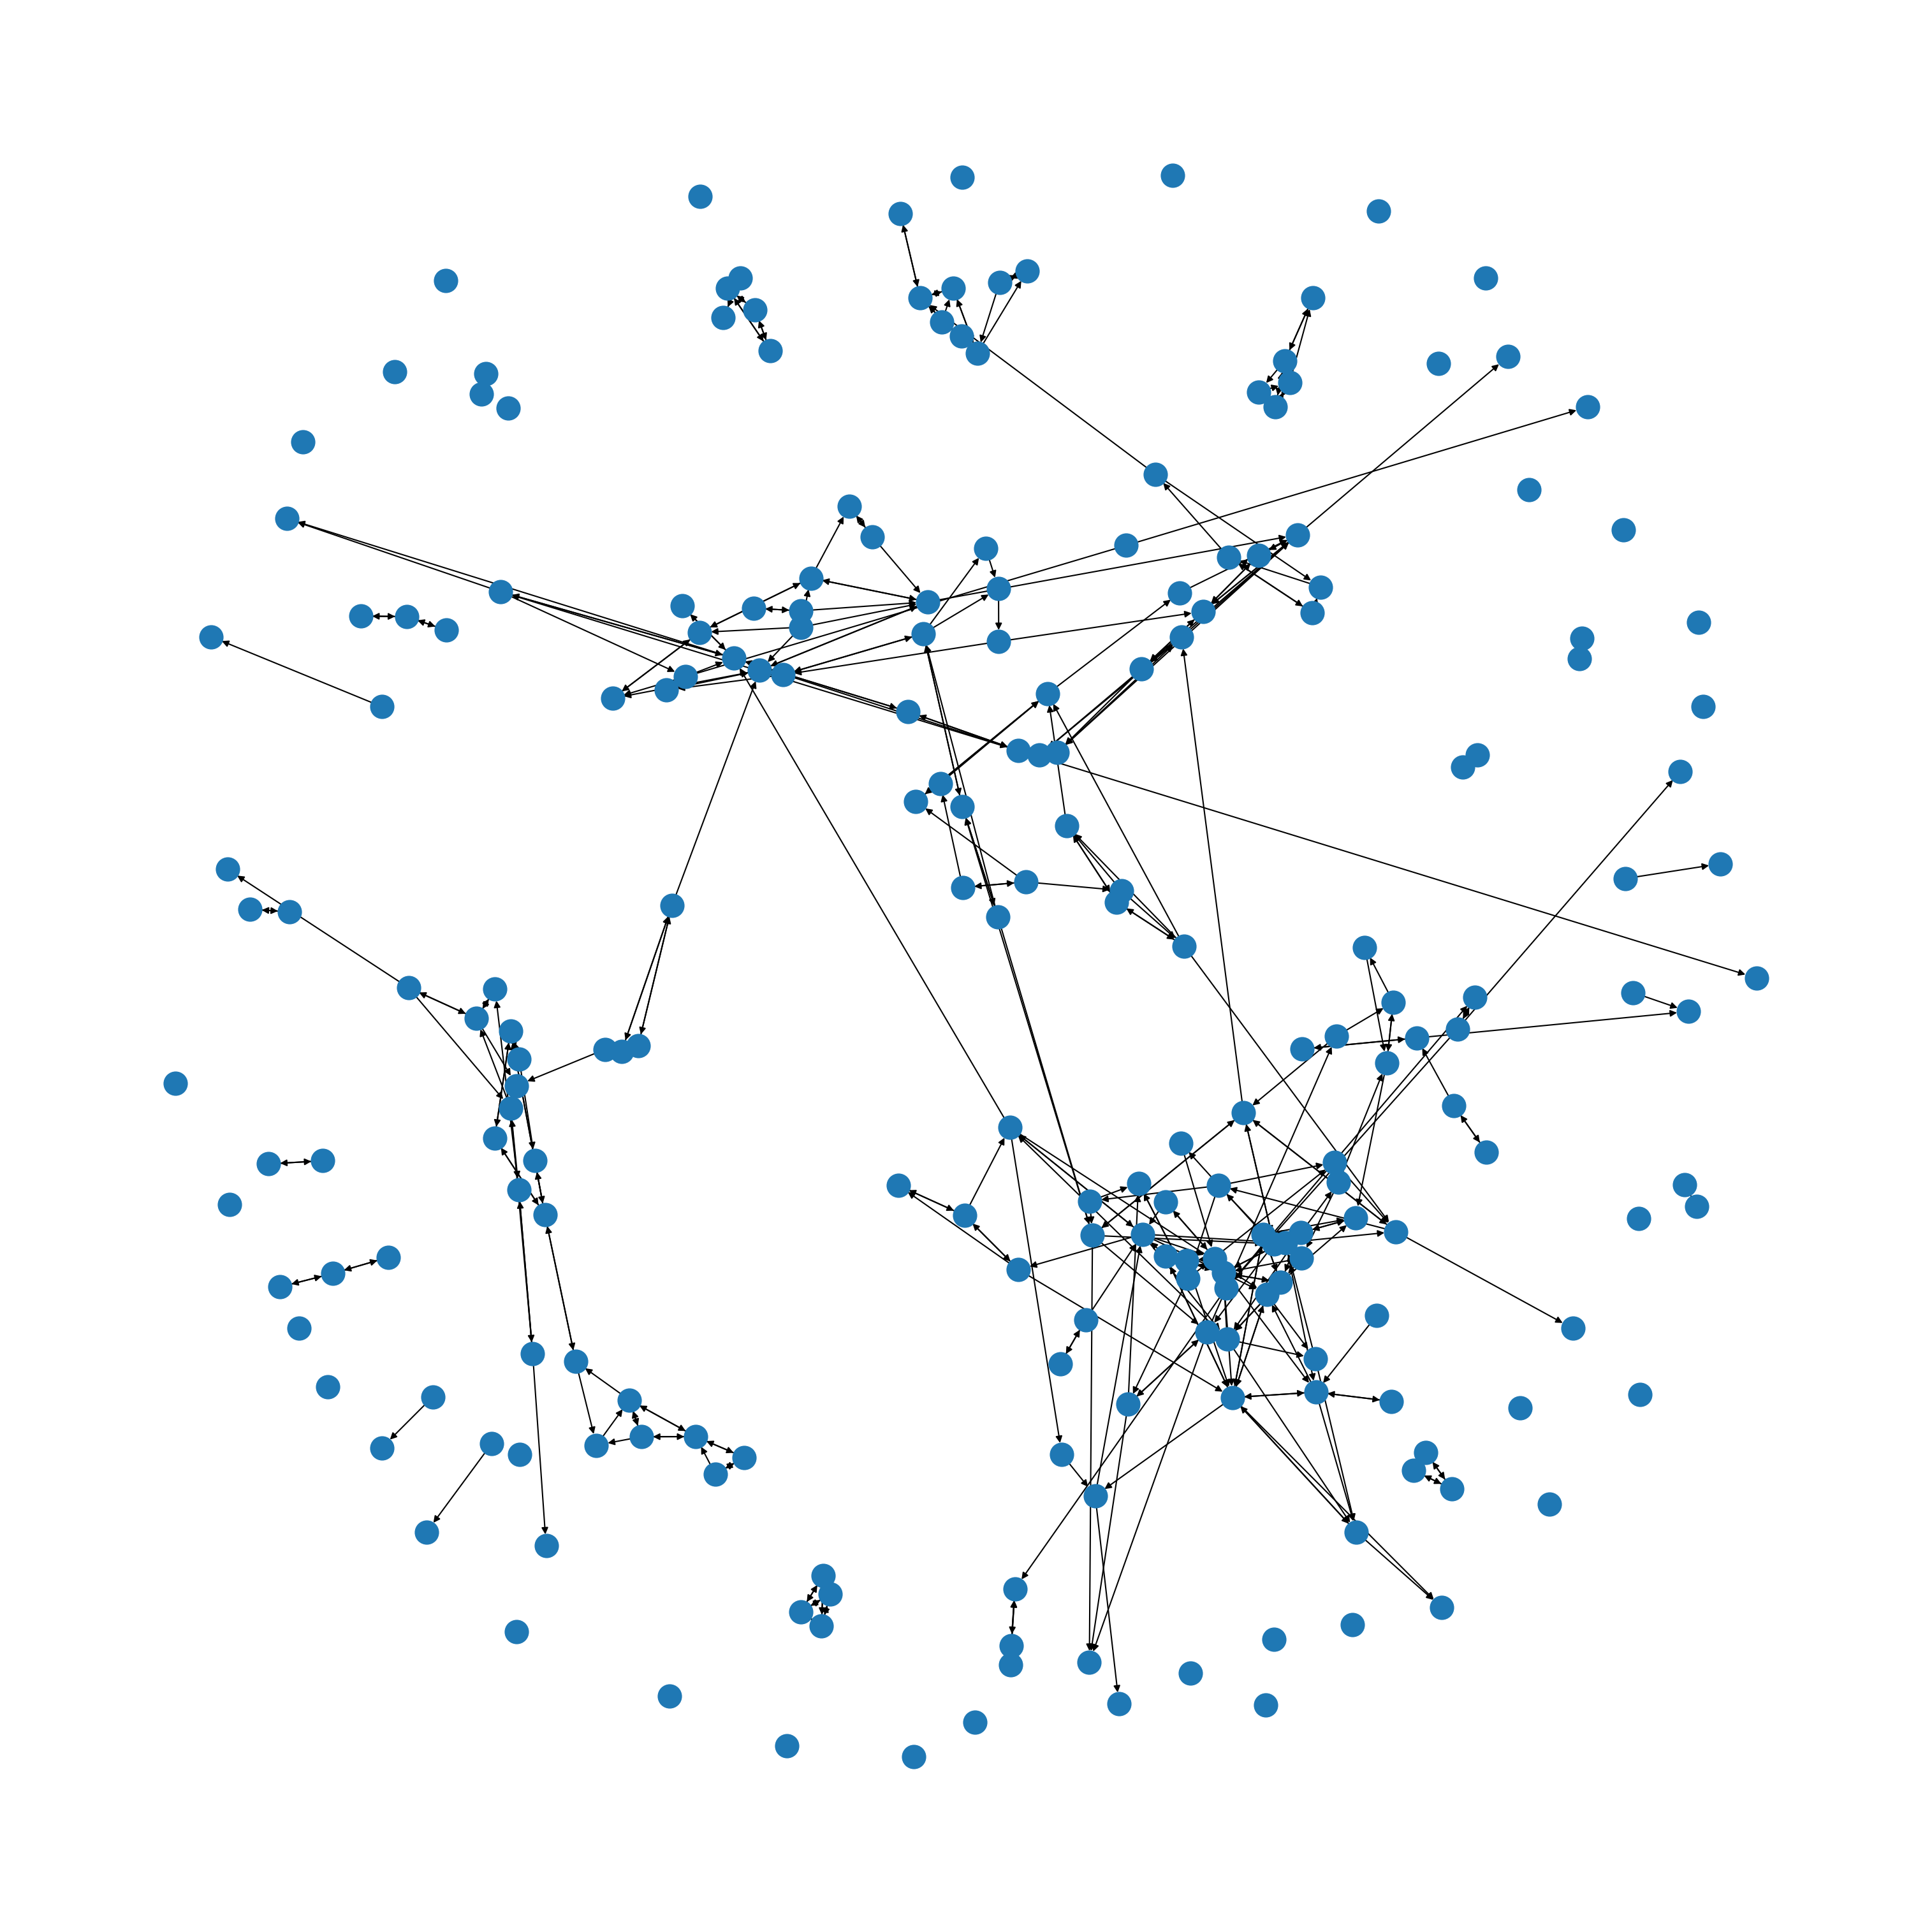

In [149]:
nx.draw(g)       